In [35]:
# Resource: https://github.com/gmonce/scikit-learn-book/blob/master/Chapter%202%20-%20Supervised%20learning%20-%20Explaining%20Titanic%20Hypothesis%20with%20Decision%20Trees.ipynb

import IPython
import sklearn as sk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
!pip install pydot
import pydot
import pyparsing

print ('IPython version:', IPython.__version__)
print ('numpy version:', np.__version__)
print ('scikit-learn version:', sk.__version__)
print ('matplotlib version:', matplotlib.__version__)
print ('pydot version:', pydot.__version__)
print ('pyparsing version:', pyparsing.__version__)

('IPython version:', '5.5.0')
('numpy version:', '1.14.5')
('scikit-learn version:', '0.19.1')
('matplotlib version:', '2.1.2')
('pydot version:', '1.2.4')
('pyparsing version:', '2.2.0')


In [37]:
import csv
import numpy as np

!wget https://play.minio.io:9000/rao/titanic.csv -P /temp
with open('/temp/titanic.csv', 'rb') as csvfile:
    titanic_reader = csv.reader(csvfile, delimiter=',', quotechar='"')
    
    # Header contains feature names
    row = titanic_reader.next()
    feature_names = np.array(row)
    
    # Load dataset, and target classes
    titanic_X, titanic_y = [], []
    for row in titanic_reader:  
        titanic_X.append(row)
        titanic_y.append(row[2]) # The target value is "survived"
    
    titanic_X = np.array(titanic_X)
    titanic_y = np.array(titanic_y)

--2018-06-25 17:59:23--  https://play.minio.io:9000/rao/titanic.csv
Resolving play.minio.io (play.minio.io)... 147.75.201.93
Connecting to play.minio.io (play.minio.io)|147.75.201.93|:9000... connected.
HTTP request sent, awaiting response... 200 OK
Length: 115632 (113K) [text/csv]
Saving to: ‘/temp/titanic.csv.2’

titanic.csv.2       100%[===================>] 112.92K  --.-KB/s    in 0.06s   

2018-06-25 17:59:24 (1.90 MB/s) - ‘/temp/titanic.csv.2’ saved [115632/115632]



In [38]:
print feature_names, titanic_X[0], titanic_y[0]

['row.names' 'pclass' 'survived' 'name' 'age' 'embarked' 'home.dest'
 'room' 'ticket' 'boat' 'sex'] ['1' '1st' '1' 'Allen, Miss Elisabeth Walton' '29.0000' 'Southampton'
 'St Louis, MO' 'B-5' '24160 L221' '2' 'female'] 1


In [39]:
# we keep the class, the age and the sex
titanic_X = titanic_X[:, [1, 4, 10]]
feature_names = feature_names[[1, 4, 10]]
print feature_names
print titanic_X[12], titanic_y[12]

['pclass' 'age' 'sex']
['1st' 'NA' 'female'] 1


In [40]:
ages = titanic_X[:, 1]
mean_age = np.mean(titanic_X[ages != 'NA', 1].astype(np.float))
titanic_X[titanic_X[:, 1] == 'NA', 1] = mean_age
print feature_names
print titanic_X[12], titanic_y[12]

['pclass' 'age' 'sex']
['1st' '31.19418104265403' 'female'] 1


In [41]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
label_encoder = enc.fit(titanic_X[:, 2])
print "Categorical classes:", label_encoder.classes_
integer_classes = label_encoder.transform(label_encoder.classes_)
print "Integer classes:", integer_classes
t = label_encoder.transform(titanic_X[:, 2])
titanic_X[:, 2] = t
print 'Feature names:',feature_names
print 'Features for instance number 12:',titanic_X[12], titanic_y[12]

Categorical classes: ['female' 'male']
Integer classes: [0 1]
Feature names: ['pclass' 'age' 'sex']
Features for instance number 12: ['1st' '31.19418104265403' '0'] 1


In [42]:
from sklearn.preprocessing import OneHotEncoder

enc = LabelEncoder()
label_encoder = enc.fit(titanic_X[:, 0])
print "Categorical classes:", label_encoder.classes_
integer_classes = label_encoder.transform(label_encoder.classes_).reshape(3, 1)
print "Integer classes:", integer_classes
enc = OneHotEncoder()
one_hot_encoder = enc.fit(integer_classes)
# First, convert clases to 0-(N-1) integers using label_encoder
num_of_rows = titanic_X.shape[0]
t = label_encoder.transform(titanic_X[:, 0]).reshape(num_of_rows, 1)
# Second, create a sparse matrix with three columns, each one indicating if the instance belongs to the class
new_features = one_hot_encoder.transform(t)
# Add the new features to titanix_X
titanic_X = np.concatenate([titanic_X, new_features.toarray()], axis = 1)
#Eliminate converted columns
titanic_X = np.delete(titanic_X, [0], 1)
# Update feature names
feature_names = ['age', 'sex', 'first_class', 'second_class', 'third_class']
# Convert to numerical values
titanic_X = titanic_X.astype(float)
titanic_y = titanic_y.astype(float)

Categorical classes: ['1st' '2nd' '3rd']
Integer classes: [[0]
 [1]
 [2]]


In [43]:
print 'New feature names:',feature_names
print 'Values:',titanic_X[0]

New feature names: ['age', 'sex', 'first_class', 'second_class', 'third_class']
Values: [29.  0.  1.  0.  0.]


In [18]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic_X, titanic_y, test_size=0.25, random_state=33)

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_leaf=5)
clf = clf.fit(X_train,y_train)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3 libgraphite2-3
  libgvc6 libgvpr2 libharfbuzz0b libjbig0 libltdl7 libpango-1.0-0
  libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4 libpixman-1-0
  libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0 libxcb-shm0
  libxmu6 libxpm4 libxt6
Suggested packages:
  gsfonts graphviz-doc libgd-tools
The following NEW packages will be installed:
  fontconfig graphviz libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgraphite2-3 libgvc6 libgvpr2 libharfbuzz0b libjbig0 libltdl7
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4
  libpixman-1-0 libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0
  libxcb-shm0 libxmu6 libxpm4 libxt6
0 upgraded, 28 newly installed, 0 to remove and 6 not upgraded.
Need to get 4,122 kB of archives.
After this operation, 2

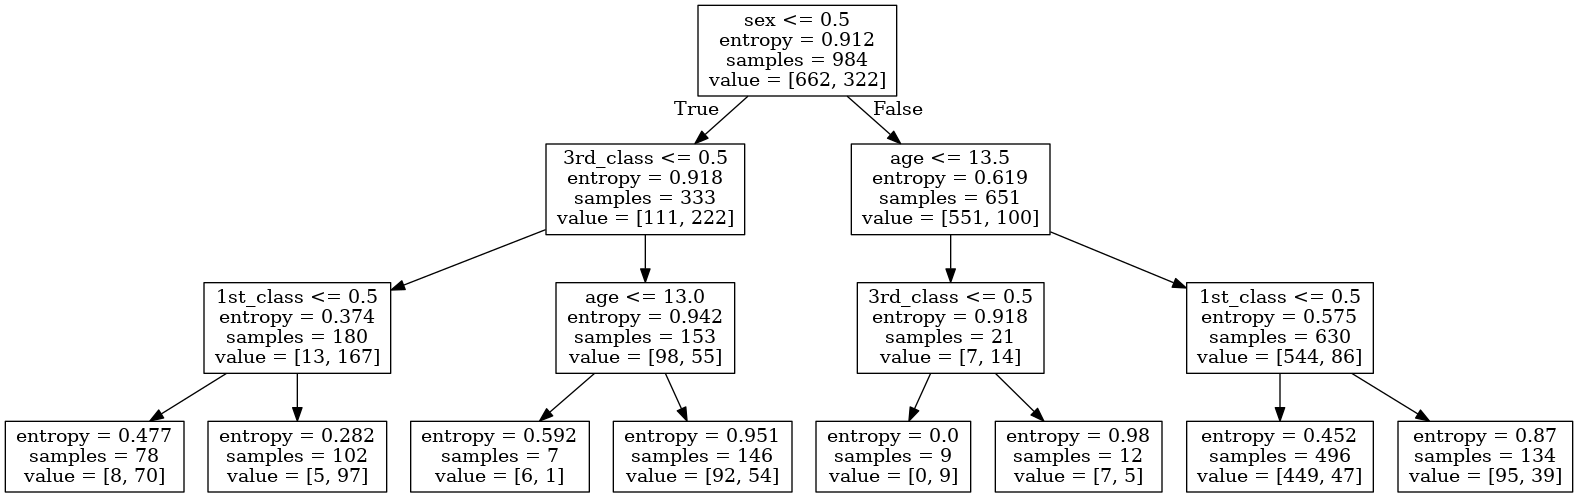

In [27]:
!apt-get install graphviz
!pip install pydot
import pydot
import StringIO
dot_data = StringIO.StringIO() 
tree.export_graphviz(clf, out_file=dot_data, feature_names=['age','sex','1st_class','2nd_class','3rd_class']) 
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('titanic.png') 
from IPython.core.display import Image 
Image(filename='titanic.png')

In [28]:
from sklearn import metrics
def measure_performance(X,y,clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred=clf.predict(X)   
    if show_accuracy:
        print "Accuracy:{0:.3f}".format(metrics.accuracy_score(y,y_pred)),"\n"

    if show_classification_report:
        print "Classification report"
        print metrics.classification_report(y,y_pred),"\n"
        
    if show_confusion_matrix:
        print "Confusion matrix"
        print metrics.confusion_matrix(y,y_pred),"\n"
        
measure_performance(X_train,y_train,clf, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.838 



In [31]:
from sklearn.cross_validation import cross_val_score, LeaveOneOut
from scipy.stats import sem

def loo_cv(X_train,y_train,clf):
    # Perform Leave-One-Out cross validation
    # We are preforming 1313 classifications!
    loo = LeaveOneOut(X_train[:].shape[0])
    scores=np.zeros(X_train[:].shape[0])
    for train_index,test_index in loo:
        X_train_cv, X_test_cv= X_train[train_index], X_train[test_index]
        y_train_cv, y_test_cv= y_train[train_index], y_train[test_index]
        clf = clf.fit(X_train_cv,y_train_cv)
        y_pred=clf.predict(X_test_cv)
        scores[test_index]=metrics.accuracy_score(y_test_cv.astype(int), y_pred.astype(int))
    print ("Mean score: {0:.3f} (+/-{1:.3f})").format(np.mean(scores), sem(scores))
    
loo_cv(X_train, y_train,clf)

Mean score: 0.837 (+/-0.012)


In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10,random_state=33)
clf = clf.fit(X_train,y_train)
loo_cv(X_train,y_train,clf)

Mean score: 0.817 (+/-0.012)


In [34]:
clf_dt=tree.DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_leaf=5)
clf_dt.fit(X_train,y_train)
measure_performance(X_test,y_test,clf_dt)

Accuracy:0.793 

Classification report
             precision    recall  f1-score   support

        0.0       0.77      0.96      0.85       202
        1.0       0.88      0.54      0.67       127

avg / total       0.81      0.79      0.78       329


Confusion matrix
[[193   9]
 [ 59  68]] 

